## Importación de librerías


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
#También cargaremos todas las funciones de preprocesamientoo de scikit-learn, contenidas en el scikit preprocessing.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder # para variables con orden jerárquico
from sklearn import model_selection
from sklearn import metrics

from pandas.plotting import scatter_matrix

from sklearn.tree import export_graphviz
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold

In [2]:
#!pip install feature_engine 
#necesario para freq encoding

In [3]:
from sklearn import __version__ as sklearn_version
print('La versión instalada de scikit-learn es {}.'.format(sklearn_version))

La versión instalada de scikit-learn es 1.0.2.


## Funciones

In [4]:
def datosGenerales(df):
    # Vemos shape
    print("Su shape",df.shape);

    # vemos número de duplicados
    print("El número de duplicados es ",\
          df.duplicated().sum());
    
    # vemos recuento de nulos y si los hay, vemos su porcentaje
    return df.isnull().sum().apply(lambda row:
                                    f"{row} nulos, {round(row / df.shape[0]*100,2)} %"
                                       if row != 0 else f"{row} nulos ________")

def analyze_X(X):
        '''
        Analiza el DataFrame que le paso y devuelve un report con los nulos, la distribución y otras informaciones.
        '''
        #   if self.target_column in X.columns:
        #       X = X.drop(self.target_column, axis = 1)
        # taka de dtypes
        dtypes = X.dtypes.to_frame().rename(columns = {0:"Dtypes"})
        # tabla de nulos
        nulls = X.isnull().sum().to_frame().rename(columns = {0:"Absolute_nulls"})
        nulls["Relative_nulls"] = nulls["Absolute_nulls"]/X.shape[0]
        nulls["Relative_nulls"] = nulls["Relative_nulls"].apply(
            lambda number: f"{round(number, 3) * 100}%"
        )
        nulls = pd.concat([nulls, dtypes], axis = 1)
        nulls["Shape"] = X.shape[0]
        nulls = nulls[["Dtypes", "Shape", "Absolute_nulls", "Relative_nulls"]]
        # tabla de describe
        describe_values_num = X.describe().T
        report_df = pd.concat([nulls, describe_values_num], axis = 1)
        # unique
        object_columns = X.select_dtypes("object").columns
        unique_categories = {col:X[col].nunique() for col in object_columns} #diccionario
        unique_cat_df = pd.DataFrame( #a data frame
            data = unique_categories.values(),
            index = unique_categories.keys(),
            columns = ["Unique_category"]
        )
        report_df = pd.concat([report_df, unique_cat_df], axis = 1)
        report_df.fillna("", inplace = True) #rellenar na
        report_df.sort_values("Dtypes", ascending = True, inplace = True) #ordenar por dtype
        return report_df
    
def obtener_lista_variables(dataset):
    lista_num=[]
    lista_cat=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_num.append(i)
       
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_cat.append(i)
    return lista_num, lista_cat       

def plot_num(dataframe, column, target):
    
    print("Atributo: ",column)
    with sns.color_palette("Set2") :
         plt.figure(figsize = (15,5))

    ax1 = plt.subplot(1,3,1)
    ax1 = dataframe[column].plot(kind= 'hist', bins = 50)

    ax2 = plt.subplot(1,3,2)
    ax2 = sns.boxplot(data = dataframe, x = target, y = column)

    ax3 = plt.subplot(1,3,3)
    ax3_1 = dataframe[dataframe[target] == 0][column].plot(kind = 'hist', bins = 25, alpha = .5)      
    ax3_2 = dataframe[dataframe[target] == 1][column].plot(kind = 'hist', bins = 25, alpha = .5)
    ax3 = ax3_1 
    ax3 = ax3_2
    ax3.legend(labels=[0,1], loc='right')
    #ax3=sns.kdeplot(
    #               data=dataframe, x=column, hue=target,
    #               fill=True, common_norm=False, palette="crest",
    #               alpha=.5, linewidth=0,
    #                )
  

    plt.show()

## Importación de datos 

In [5]:
df = pd.read_csv(r'C:\Competencia\supply_chain_train.csv')

In [6]:
df_test = pd.read_csv(r'C:\Competencia\supply_chain_test.csv')

In [7]:
target='Attrition_Flag'

In [8]:
df.drop('train_idx',axis=1,inplace=True)

In [9]:
df.set_index('CLIENTNUM',inplace=True)

In [10]:
reporte=analyze_X(df)

In [11]:
reporte.to_excel('reporte.xlsx')

In [12]:
reporte
#no hay nulos

,Dtypes,Shape,Absolute_nulls,Relative_nulls,count,mean,std,min,25%,50%,75%,max,Unique_category
Customer_Age,int64,8101,0,0.0%,"8,101.00",46.31,8.02,26.00,41.00,46.00,52.00,70.00,
Total_Trans_Ct,int64,8101,0,0.0%,"8,101.00",64.91,23.56,10.00,45.00,67.00,81.00,139.00,
Total_Trans_Amt,int64,8101,0,0.0%,"8,101.00","4,402.99","3,401.71",510.00,"2,160.00","3,897.00","4,739.00","18,484.00",
Total_Revolving_Bal,int64,8101,0,0.0%,"8,101.00","1,160.38",815.50,0.00,326.00,"1,273.00","1,782.00","2,517.00",
Contacts_Count_12_mon,int64,8101,0,0.0%,"8,101.00",2.45,1.10,0.00,2.00,2.00,3.00,6.00,
Total_Relationship_Count,int64,8101,0,0.0%,"8,101.00",3.81,1.55,1.00,3.00,4.00,5.00,6.00,
Months_on_book,int64,8101,0,0.0%,"8,101.00",35.92,8.02,13.00,31.00,36.00,40.00,56.00,
Months_Inactive_12_mon,int64,8101,0,0.0%,"8,101.00",2.35,1.01,0.00,2.00,2.00,3.00,6.00,
Dependent_count,int64,8101,0,0.0%,"8,101.00",2.33,1.29,0.00,1.00,2.00,3.00,5.00,
Attrition_Flag,int64,8101,0,0.0%,"8,101.00",0.84,0.37,0.00,1.00,1.00,1.00,1.00,


## Data Understanding
#### Distribución de los valores del target

In [13]:
df['Attrition_Flag'].value_counts()

1    6801
0    1300
Name: Attrition_Flag, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

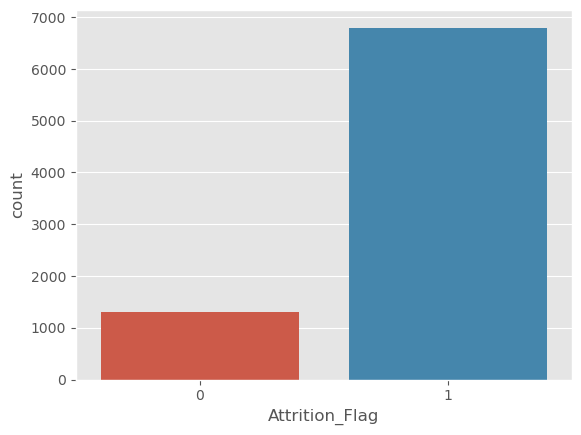

In [14]:
#Utilizo el *easy plot* de Seaborn para obtener una visualización sencilla
sns.countplot(data=df, x='Attrition_Flag')

In [15]:
df['Attrition_Flag'].mean()
#dataset desbalanceado

0.8395259844463646

Nuestro target es una variable boolean con una **media de 0.83**. Esta a va a ser la referencia que tendremos en cuenta como el valor minimo de nuestro modelo de clasificación.

#### Distribución de variables y correlación con el target

In [16]:
obtener_lista_variables(df)

(['Customer_Age',
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'],
 ['Gender',
  'Education_Level',
  'Marital_Status',
  'Income_Category',
  'Card_Category'])

In [17]:
lista_num=['Customer_Age',
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio']

In [18]:
lista_cat=['Gender',
  'Education_Level',
  'Marital_Status',
  'Income_Category',
  'Card_Category']

In [19]:

#Dividimos los atributos en numericos y categoricos para poder hacer más facil el analísis y verificar que nos se haya quedado ninguna columna fuera.
#El 1 es por el target
assert (len(lista_num) + len(lista_cat) + 1) == (int(df.shape[1])), "You have missed some columns"

Atributo:  Customer_Age


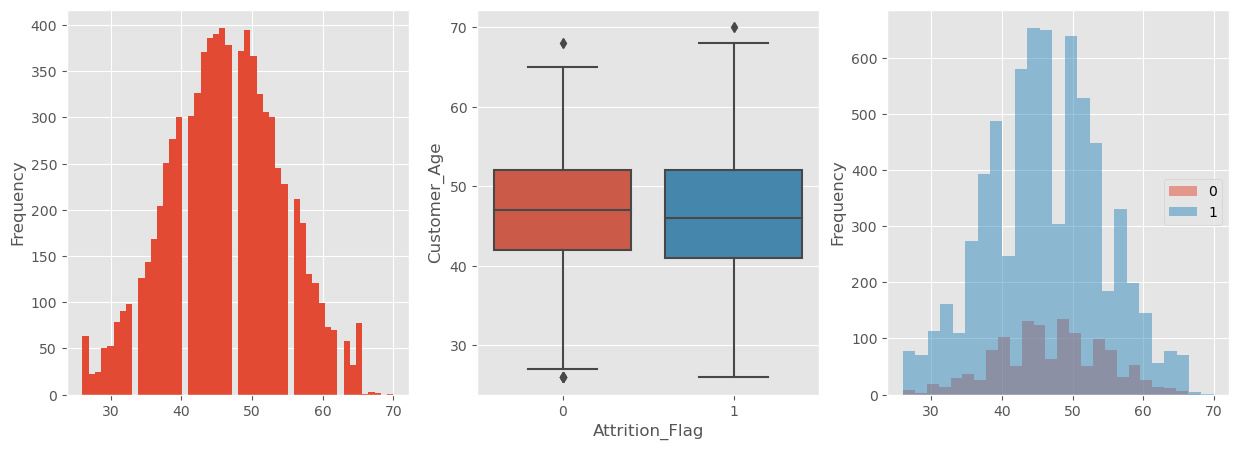

Atributo:  Dependent_count


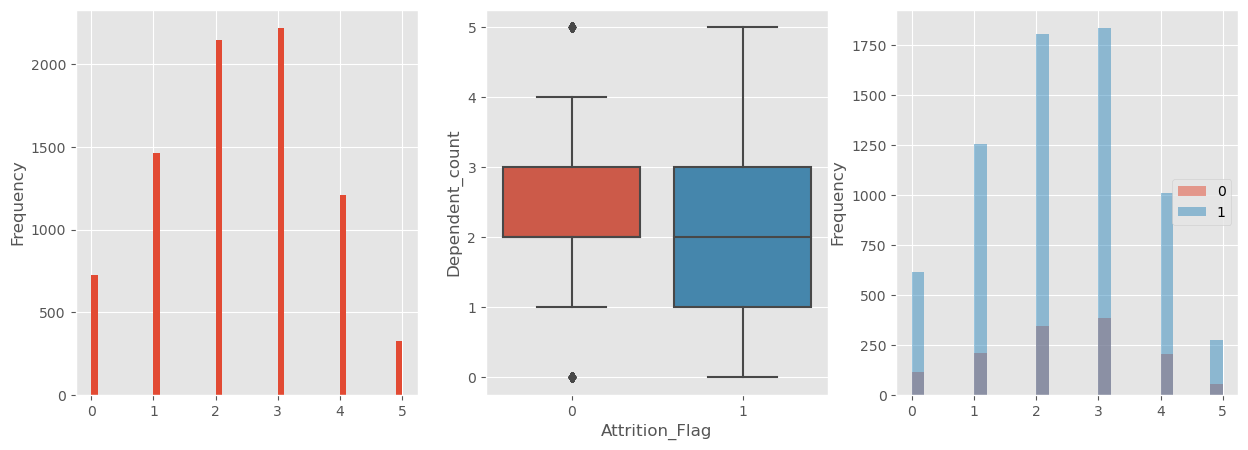

Atributo:  Months_on_book


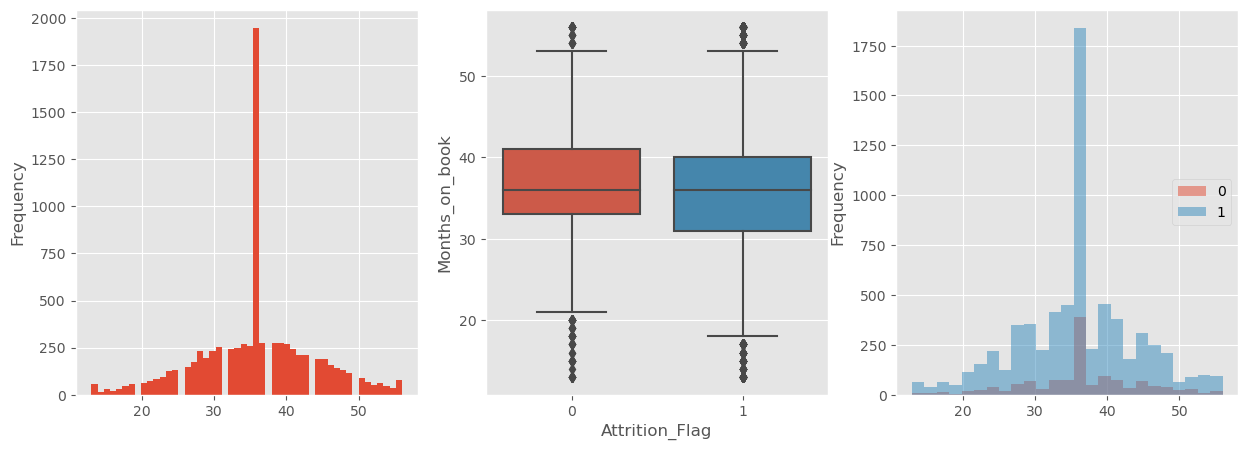

Atributo:  Total_Relationship_Count


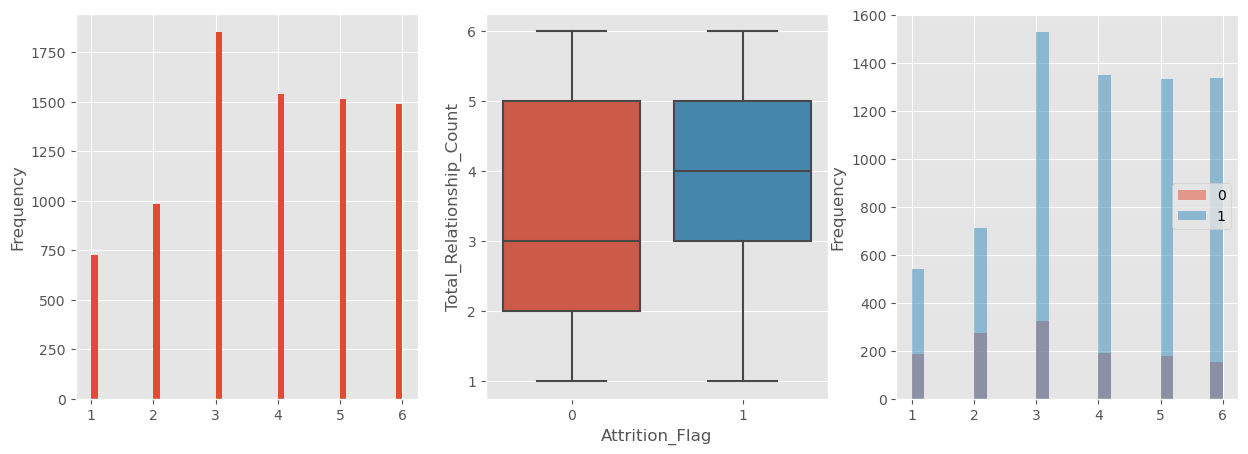

Atributo:  Months_Inactive_12_mon


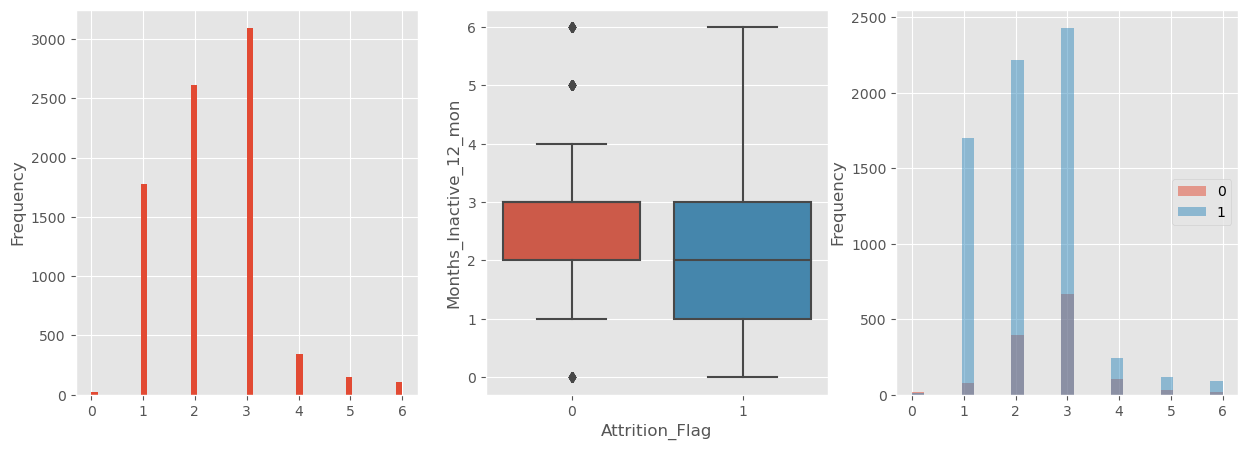

Atributo:  Contacts_Count_12_mon


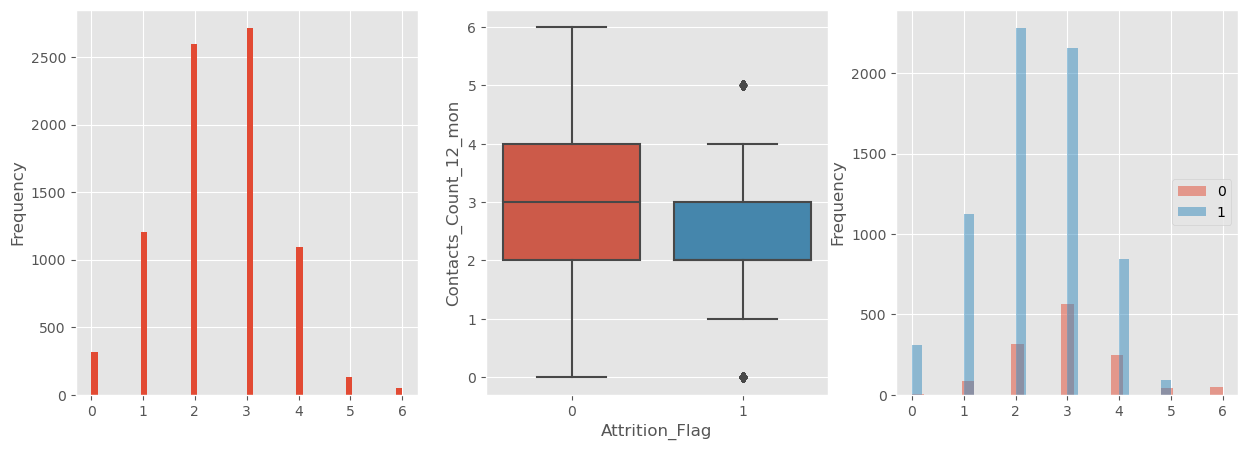

Atributo:  Credit_Limit


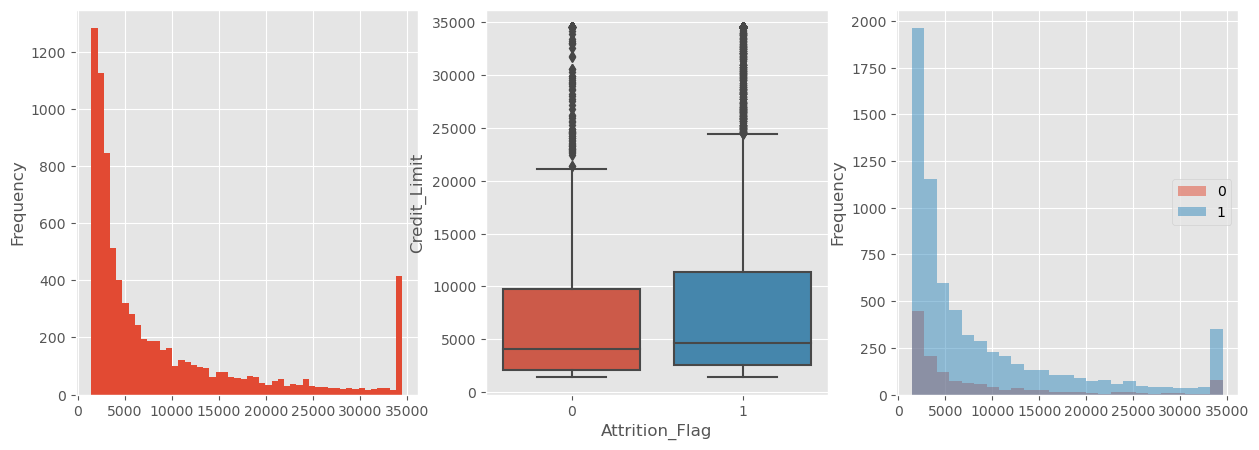

Atributo:  Total_Revolving_Bal


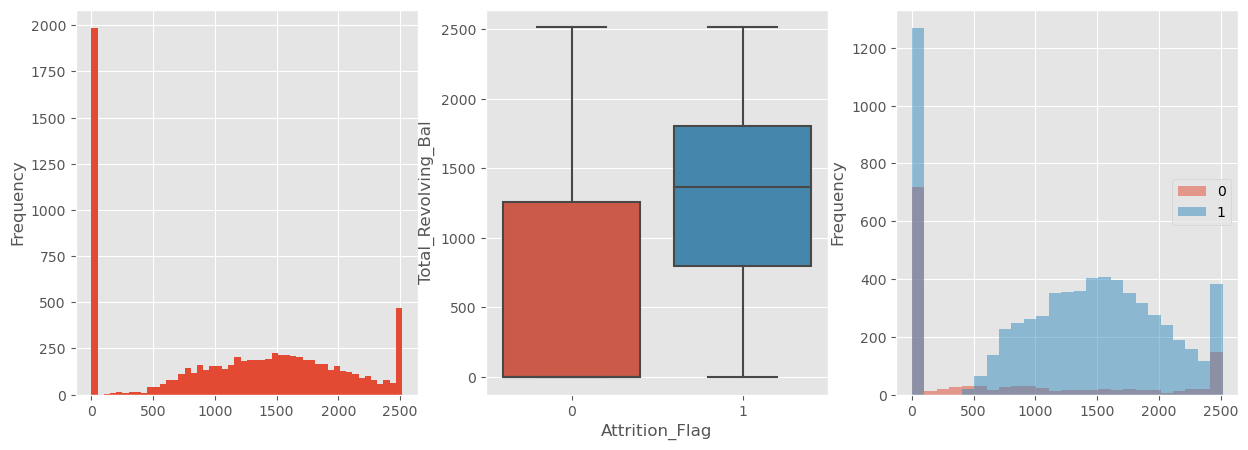

Atributo:  Avg_Open_To_Buy


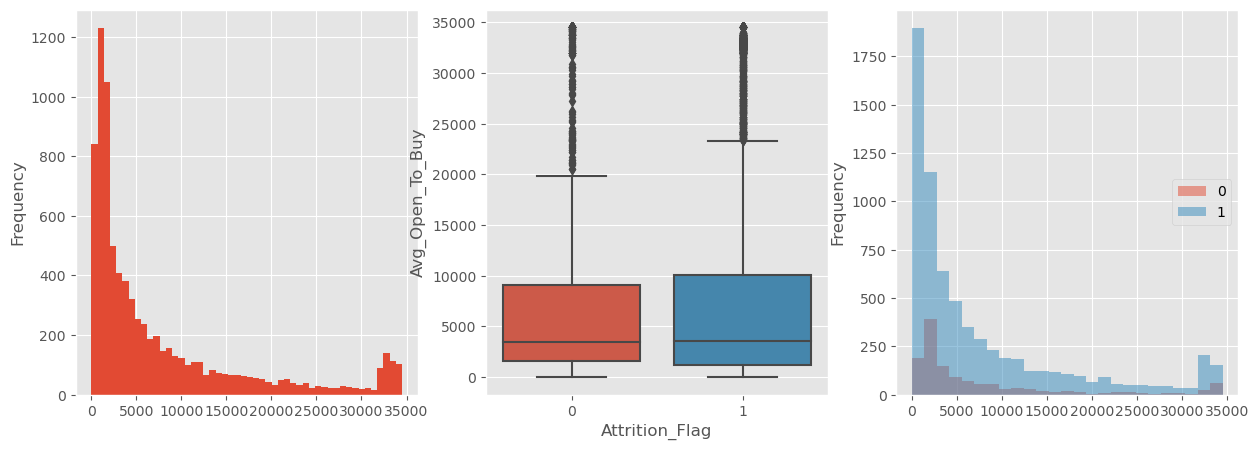

Atributo:  Total_Amt_Chng_Q4_Q1


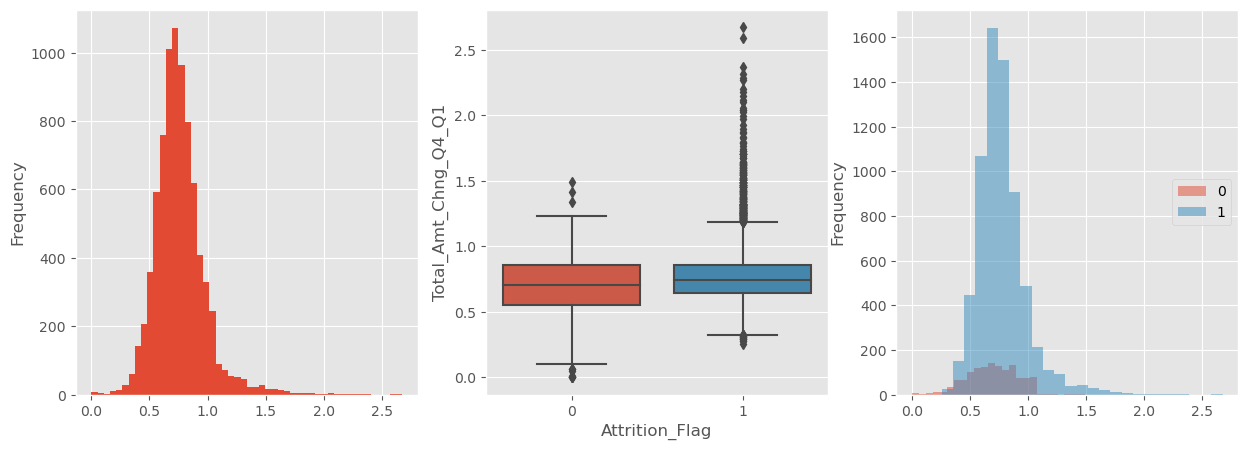

Atributo:  Total_Trans_Amt


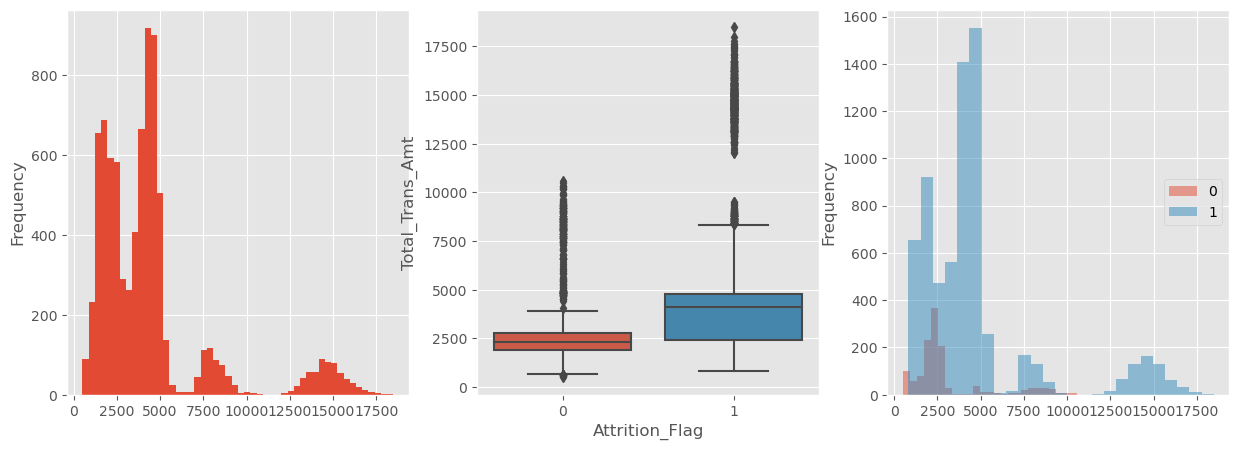

Atributo:  Total_Trans_Ct


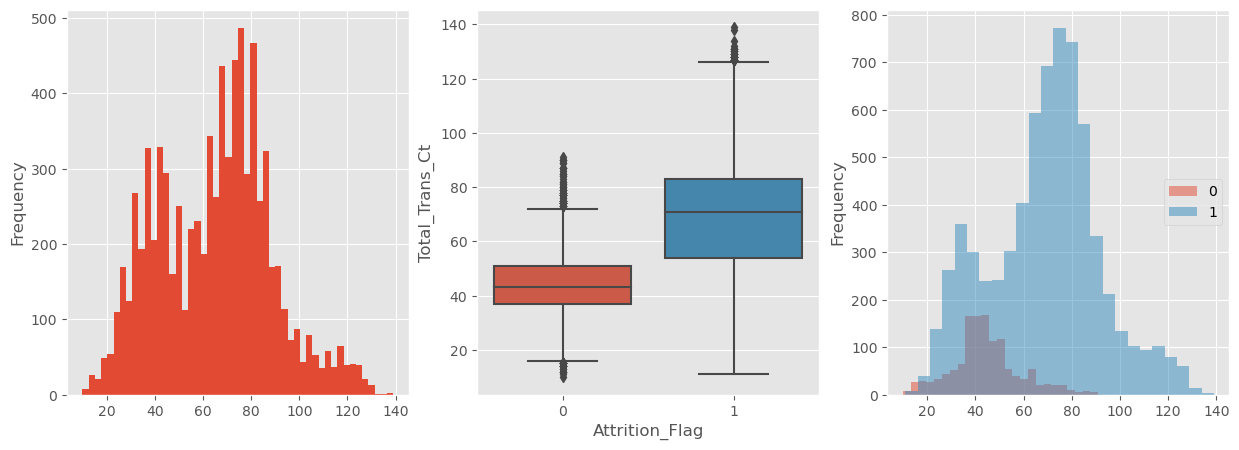

Atributo:  Total_Ct_Chng_Q4_Q1


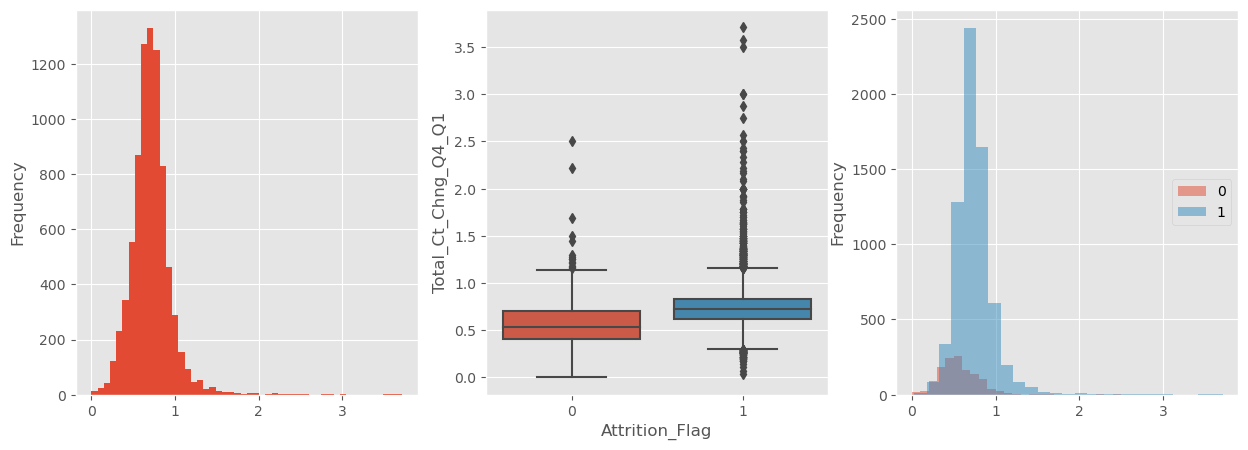

Atributo:  Avg_Utilization_Ratio


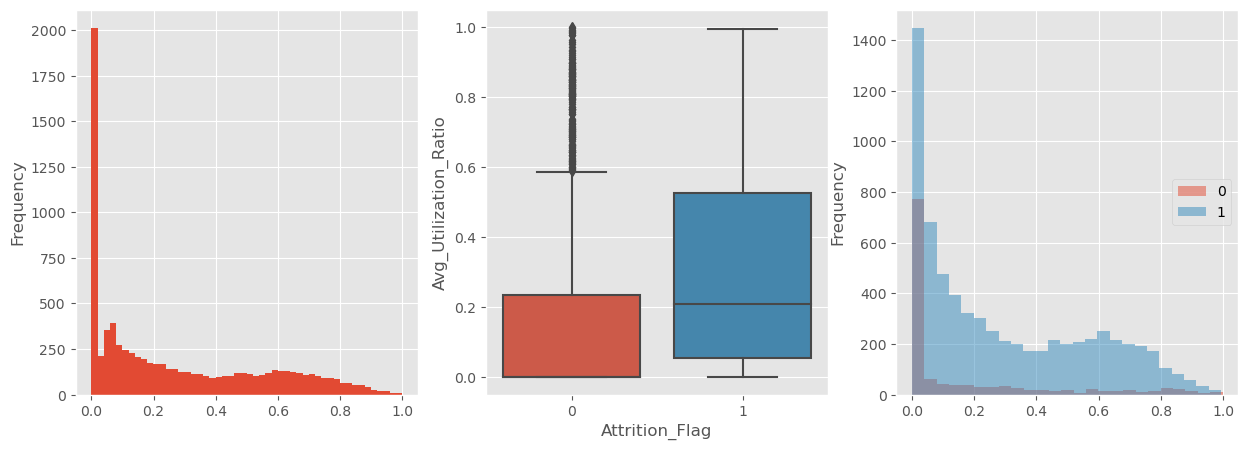

In [20]:
for i in lista_num: plot_num(df,i,target)
#edad: separando por el target, tiene parecida distribucion lo que cerraron cuenta  y los que no. La media de edad es similar.
#cuantas mas relaciones en cuenta, mas posibilidad de quedarte en el banco

In [21]:
df['Months_on_book'].value_counts().head(5)

36    1950
39     276
37     276
38     274
40     269
Name: Months_on_book, dtype: int64

#### límite de crédito

<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

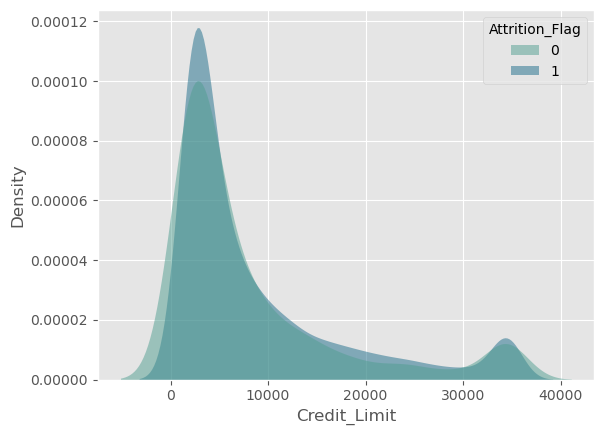

In [22]:
#hay poco impacto del limite de crédito sobre el target
#hay mas clientes con bajos limites de crédito que con target=0
sns.kdeplot(
   data=df, x="Credit_Limit", hue=target,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

#### monto total de transacciones


Total transaction amount tiene relevancia para el target. Clientes con bajos montos de transacciones tienden a un mayor abandono

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

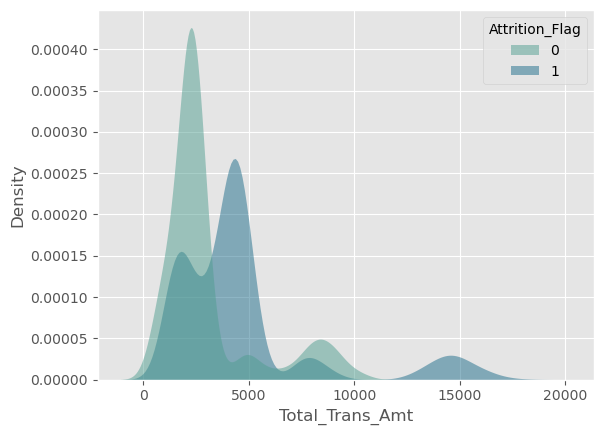

In [23]:

sns.kdeplot(
   data=df, x="Total_Trans_Amt", hue=target,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)


### Variables categóricas

In [24]:
lista_cat

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

#### Género

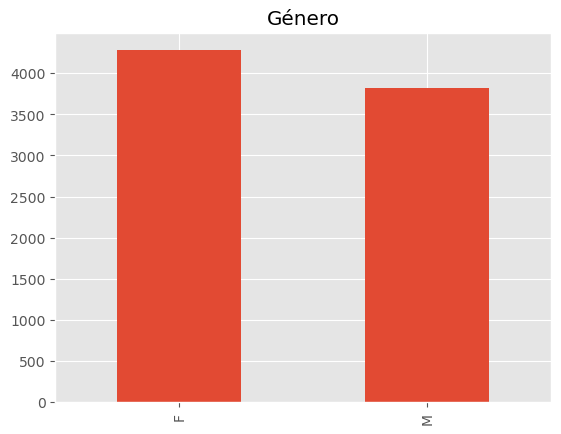

In [25]:
plot = df['Gender'].value_counts().plot(kind='bar',
                                            title='Género')

#### Ingreso

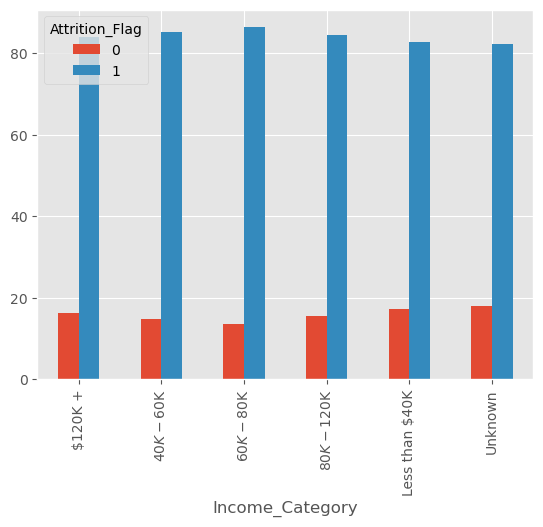

In [26]:
# Gráfico de barras de categoria de ingreso
plot = pd.crosstab(index=df['Income_Category'],
            columns=df[target]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

In [27]:
df_income=df['Income_Category'].value_counts()
df_income

Less than $40K    2812
$40K - $60K       1453
$80K - $120K      1237
$60K - $80K       1122
Unknown            889
$120K +            588
Name: Income_Category, dtype: int64

In [28]:
#reorder category 
reorderlist = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

In [29]:
#ordenamos asi el gráfico es mas facil de leer
df_income = df_income.reindex(reorderlist)

In [30]:
df_income

Less than $40K    2812
$40K - $60K       1453
$60K - $80K       1122
$80K - $120K      1237
$120K +            588
Name: Income_Category, dtype: int64

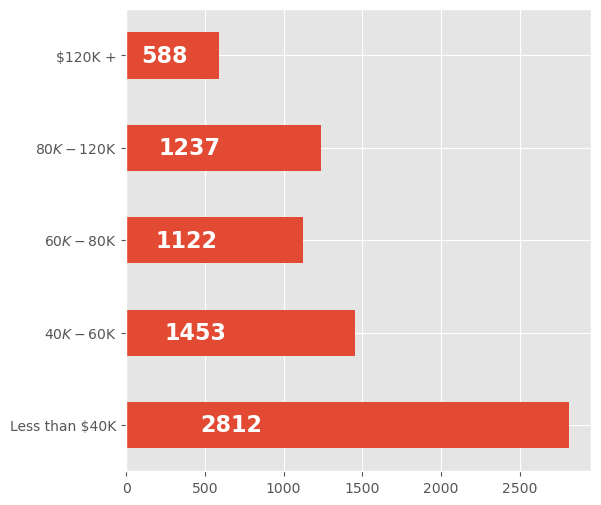

In [31]:
# uso el group_by anterior

from matplotlib import gridspec

# set figure and size
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)

spec = gridspec.GridSpec(ncols=2, nrows=1,
                         wspace=0.5,
                         hspace=0.5)

# ax1 will take first column
ax1 = fig.add_subplot(spec[0])

df_income.plot.barh(
                    stacked = True,
                    rot = 0)        
# create a list to collect the plt.patches data
totals = []

for i in ax1.patches:
        totals.append(i.get_width())
        
for i, v in enumerate(totals):
        ax1.text(v/2-(v/3), i, str(int(v)), color='white', fontweight='bold', fontsize=16, ha='left', va='center')


In [32]:
#porcentaje del total
df_income_pct = df['Income_Category'].value_counts()/len(df)

In [33]:
df_income_pct

Less than $40K   0.35
$40K - $60K      0.18
$80K - $120K     0.15
$60K - $80K      0.14
Unknown          0.11
$120K +          0.07
Name: Income_Category, dtype: float64

In [34]:
#ordenamos asi el gráfico es mas facil de leer
df_income_pct = df_income_pct.reindex(reorderlist)

<AxesSubplot:>

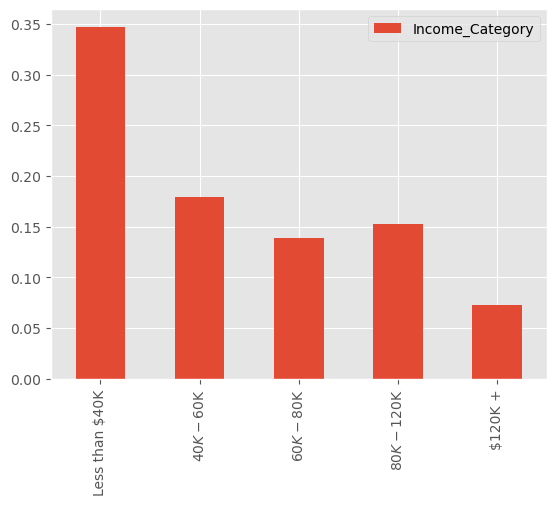

In [35]:
df_income_pct.to_frame().plot(kind='bar')

In [36]:
df_income_target=df.groupby(['Income_Category',target]).size().unstack()

In [37]:
df_income_target=df_income_target.reindex(reorderlist)

In [38]:
df_income_target

Attrition_Flag,0,1
Income_Category,,
Less than $40K,484,2328
$40K - $60K,216,1237
$60K - $80K,153,969
$80K - $120K,193,1044
$120K +,95,493


In [39]:
#armando código para gráfico
#1

In [40]:
df_income_target.T

Income_Category,Less than $40K,$40K - $60K,$60K - $80K,$80K - $120K,$120K +
Attrition_Flag,,,,,
0,484,216,153,193,95
1,2328,1237,969,1044,493


In [41]:
#2
df_income_target.T.sum()

Income_Category
Less than $40K    2812
$40K - $60K       1453
$60K - $80K       1122
$80K - $120K      1237
$120K +            588
dtype: int64

In [42]:
#3
df_income_target.T / df_income_target.T.sum()

Income_Category,Less than $40K,$40K - $60K,$60K - $80K,$80K - $120K,$120K +
Attrition_Flag,,,,,
0,0.17,0.15,0.14,0.16,0.16
1,0.83,0.85,0.86,0.84,0.84


<AxesSubplot:title={'center':'Estado de target por categoría de ingreso'}, xlabel='Categoría de ingreso', ylabel='%'>

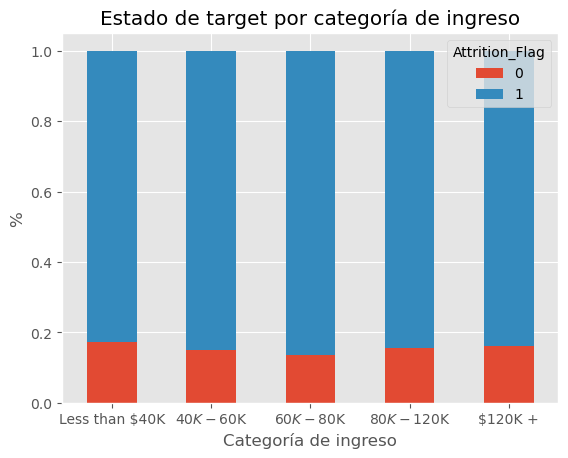

In [43]:
(df_income_target.T / df_income_target.T.sum()).T.plot(kind='bar',
                                                       width = 0.5,
                                                       stacked = True,
                                                       rot = 0 ,
                                                       title= "Estado de target por categoría de ingreso",
                                                       xlabel= "Categoría de ingreso",
                                                       ylabel= "%"
                                                     )



#Extremos de ingreso tiene una pequeña diferencia hacia target=0


#### Nivel de educación

In [44]:
df_edu=df['Education_Level'].value_counts()
df_edu

Graduate         2528
High School      1619
Unknown          1205
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: Education_Level, dtype: int64

In [45]:
reorderlist_edu =['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']

In [46]:
df_edu=df_edu.reindex(reorderlist_edu)

In [47]:
df_edu

Uneducated       1171
High School      1619
College           816
Graduate         2528
Post-Graduate     407
Doctorate         355
Name: Education_Level, dtype: int64

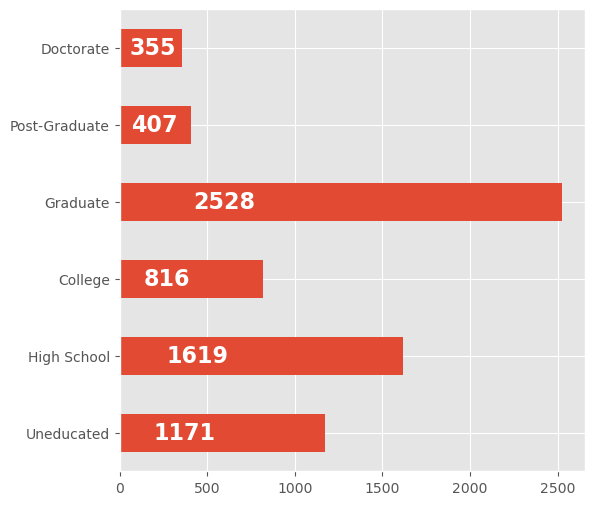

In [48]:
# uso el group_by anterior

from matplotlib import gridspec

# set figure and size
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)

spec = gridspec.GridSpec(ncols=2, nrows=1,
                         wspace=0.5,
                         hspace=0.5)

# ax1 will take first column
ax1 = fig.add_subplot(spec[0])

df_edu.plot.barh(
                    stacked = True,
                    rot = 0)        
# create a list to collect the plt.patches data
totals = []

for i in ax1.patches:
        totals.append(i.get_width())
        
for i, v in enumerate(totals):
        ax1.text(v/2-(v/3), i, str(int(v)), color='white', fontweight='bold', fontsize=16, ha='left', va='center')


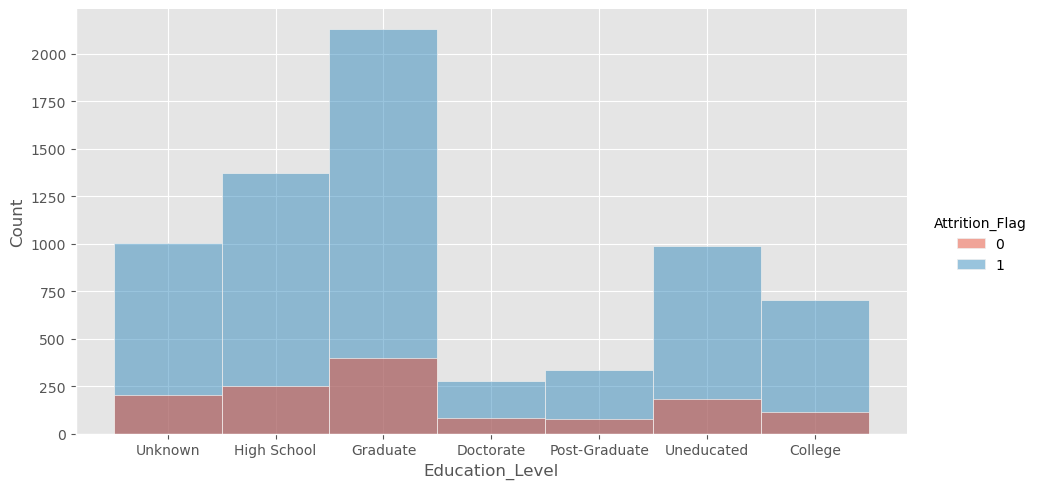

In [49]:
# graduados y aquellos sin educacion tienden a abandonar un poco mas

#Post-graduate and Doctorate tend to churn a little bit more

sns.displot(data=df, x='Education_Level',hue=target,aspect=15/8)

#### Card category

In [50]:
df_card_category=df.groupby(['Card_Category',target]).size().unstack()

In [51]:
df_card_category

Attrition_Flag,0,1
Card_Category,,
Blue,1219,6338
Gold,16,77
Platinum,5,10
Silver,60,376


In [52]:
reorderlist_card =['Blue', 'Silver', 'Gold', 'Platinum']

In [53]:
df_card_category.reindex(reorderlist_card)

Attrition_Flag,0,1
Card_Category,,
Blue,1219,6338
Silver,60,376
Gold,16,77
Platinum,5,10


<AxesSubplot:title={'center':'Estado de target por categoría de credit card'}, xlabel='Categoría de credit card', ylabel='%'>

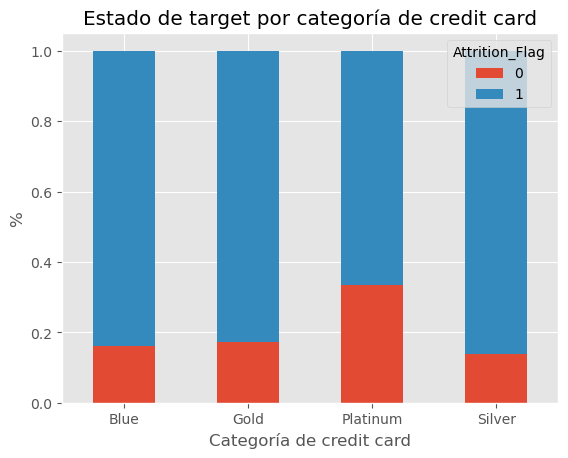

In [54]:
# clientes con tarjeta platinum tiene mas tendencia a abandonar
(df_card_category.T / df_card_category.T.sum()).T.plot(kind='bar',
                                                       width = 0.5,
                                                       stacked = True,
                                                       rot = 0 ,
                                                       title= "Estado de target por categoría de credit card",
                                                       xlabel= "Categoría de credit card",
                                                       ylabel= "%"
                                                     )



#Extremos de ingreso tiene una pequeña diferencia hacia target=0

<AxesSubplot:xlabel='Card_Category'>

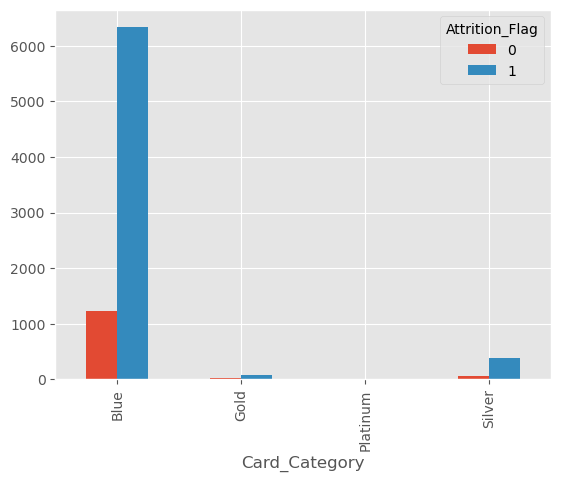

In [55]:
df_card_category.plot(kind='bar')

### Vínculo positivo entre monto de transacciones y cantidades


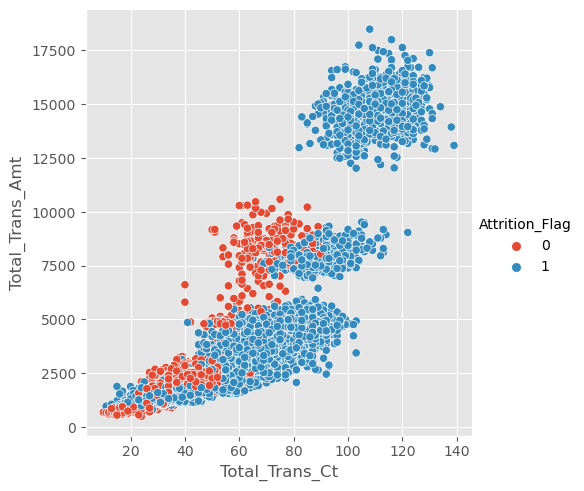

In [56]:
sns.relplot(x='Total_Trans_Ct',y='Total_Trans_Amt',hue=target,data=df) 

## Correlation Matrix

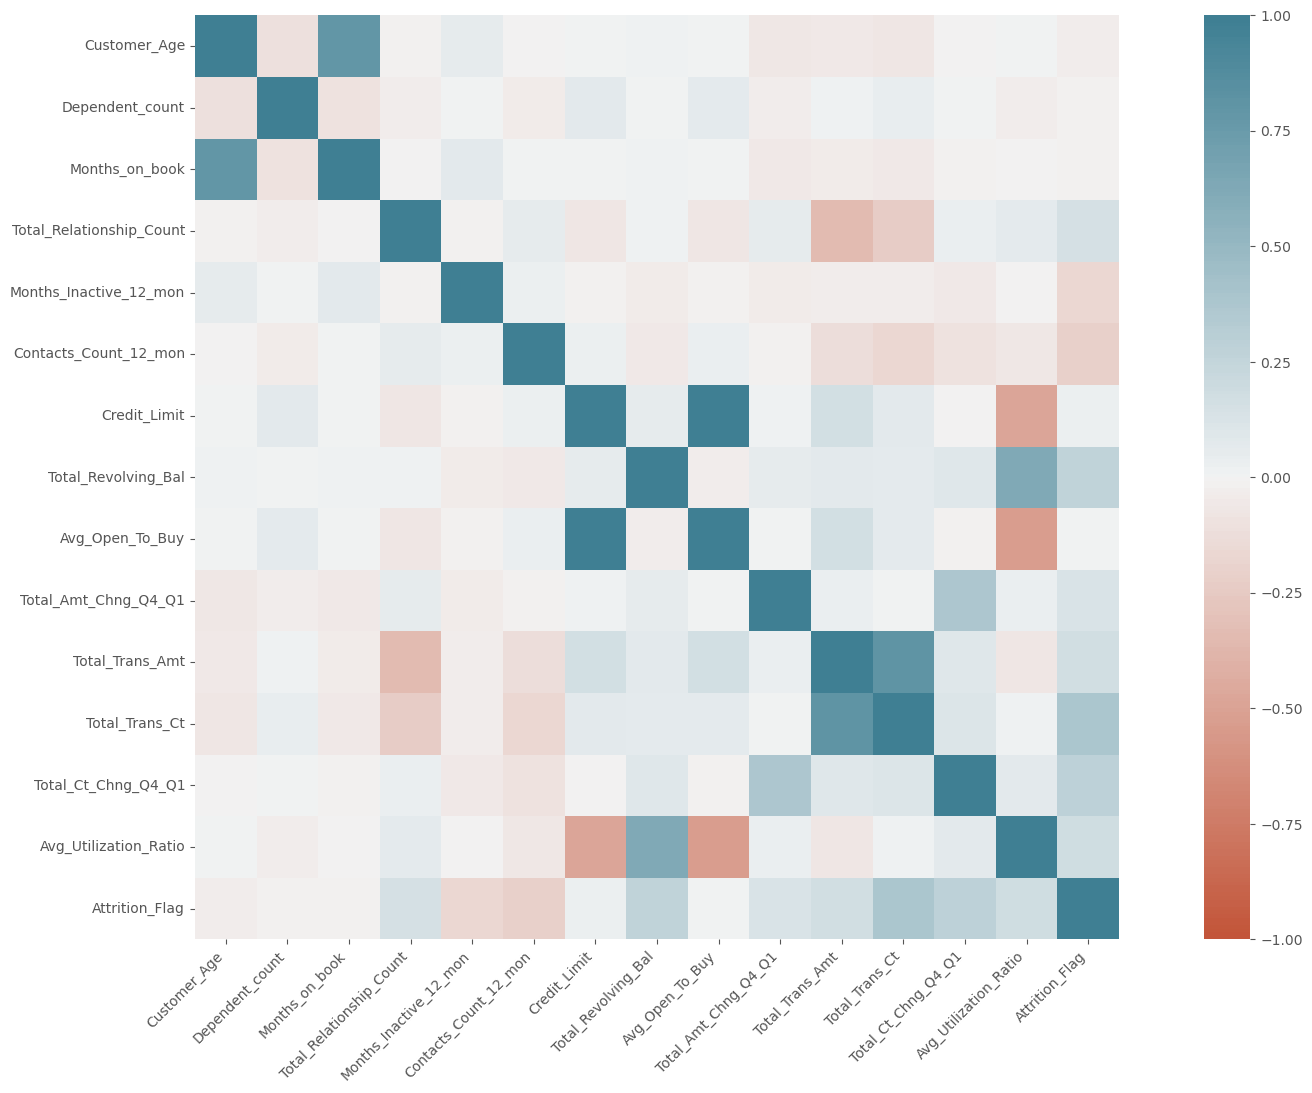

In [57]:
corr = df.corr() 

plt.figure(figsize=(22,12))
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

plt.show()

- Customer age y Months on book tienen alta correlacion porque los clientes mas jóvenes suelen recien iniciarse con una conducta bancaria
- Avg_Open_To_Buy y Credit_Limit tienen correlacion alta porque explican practicamente lo mismo
- Lo mismo sucede con Total Transaction Amount y Total Transacion Count porque los montos tienden a aumentar en la medida que aumentan las cantidades de transacciones

**El tipo de modelo que voy a aplicar no se verá afectado por la multicolinealidad**


## Imputación

### Codificacion nivel educativo, nivel de ingreso y tipo de credit card


Tenemos valores **"unknown"** que implican missing values. Vamos a jerarquizarlos en type int. Ya que estamos en un modelo de clasificación, imputamos esos nuevos nulos con un valor extremo, ya que este no será tomado en cuenta por el modelo por ser outliers.

Aplico **OrdinalEncoder** porque hay un orden jerárquico en educación, ingreso y credit card.

In [58]:
df['Education_Level'].value_counts()

Graduate         2528
High School      1619
Unknown          1205
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: Education_Level, dtype: int64

**Creo el codificador indicandole el orden de la variables**


In [59]:
#educación
encoder_edu = OrdinalEncoder(categories=[['Unknown',
                                          'Uneducated',
                                          'High School',
                                          'College',
                                          'Graduate',
                                          'Post-Graduate',
                                          'Doctorate']])
#ingreso
encoder_ingreso = OrdinalEncoder(categories=[["Unknown",
                                              "Less than $40K",
                                              "$40K - $60K",
                                              "$80K - $120K",
                                              "$60K - $80K",
                                              "$120K +"]])
#credit card
encoder_cc = OrdinalEncoder(categories=[["Blue",
                                         "Silver",
                                         "Gold",
                                         "Platinum"]])

**Ajustamos el codificador con la variable education y la transformamos**


In [60]:
encoder_edu.fit(df[["Education_Level"]])
df["Education_Level_Encoded"] = encoder_edu.transform(df[["Education_Level"]])


In [61]:
#chequeo
df[["Education_Level", "Education_Level_Encoded"]].head(3)

,Education_Level,Education_Level_Encoded
CLIENTNUM,,
713071383,Unknown,0.00
714246333,High School,2.00
718206783,Unknown,0.00


In [62]:
df['Education_Level_Encoded'].value_counts()

4.00    2528
2.00    1619
0.00    1205
1.00    1171
3.00     816
5.00     407
6.00     355
Name: Education_Level_Encoded, dtype: int64

**Ajustamos el codificador con la variable ingreso y la transformamos**


In [63]:
encoder_ingreso.fit(df[["Income_Category"]])
df["Income_Category_Encoded"] = encoder_ingreso.transform(df[["Income_Category"]])

**Ajustamos el codificador con la variable credit card y la transformamos**


In [64]:
encoder_cc.fit(df[["Card_Category"]])
df["Card_Category_Encoded"] = encoder_cc.transform(df[["Card_Category"]])

Pasamos los 0 de income y educacion a un extremo, ej -999

In [65]:
df['Education_Level_Encoded'].replace({0: -999}, inplace=True)
df['Income_Category_Encoded'].replace({0: -999}, inplace=True)


### Género y Marital Status

Para las variables nominales que no tienen un orden jerárquico en sus categorías, aplico **OHE**

In [66]:
df_1 = pd.get_dummies(data=df, columns=['Gender','Marital_Status']) 

In [67]:
dropear=['Education_Level','Income_Category','Card_Category']

In [68]:
df_1.drop(dropear,axis=1,inplace=True)

In [69]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 713071383 to 827123883
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Dependent_count           8101 non-null   int64  
 2   Months_on_book            8101 non-null   int64  
 3   Total_Relationship_Count  8101 non-null   int64  
 4   Months_Inactive_12_mon    8101 non-null   int64  
 5   Contacts_Count_12_mon     8101 non-null   int64  
 6   Credit_Limit              8101 non-null   float64
 7   Total_Revolving_Bal       8101 non-null   int64  
 8   Avg_Open_To_Buy           8101 non-null   float64
 9   Total_Amt_Chng_Q4_Q1      8101 non-null   float64
 10  Total_Trans_Amt           8101 non-null   int64  
 11  Total_Trans_Ct            8101 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1       8101 non-null   float64
 13  Avg_Utilization_Ratio     8101 non-null   float64


## IMPUTACION DE LAS VARIABLES DE TEST PARA SU POSTERIOR APLICACION DE MODELO

In [70]:
df_test.set_index('CLIENTNUM',inplace=True)
df_test.drop('test_idx',axis=1,inplace=True)

In [71]:
# Ajustamos el codificador con la variable education y la transformamos
encoder_edu.fit(df_test[["Education_Level"]])
df_test["Education_Level_Encoded"] = encoder_edu.transform(df_test[["Education_Level"]])

In [72]:
# Ajustamos el codificador con la variable ingreso y la transformamos
encoder_ingreso.fit(df_test[["Income_Category"]])
df_test["Income_Category_Encoded"] = encoder_ingreso.transform(df_test[["Income_Category"]])

In [73]:
# Ajustamos el codificador con la variable credit card y la transformamos
encoder_cc.fit(df_test[["Card_Category"]])
df_test["Card_Category_Encoded"] = encoder_cc.transform(df_test[["Card_Category"]])

In [74]:
df_test['Education_Level_Encoded'].replace({0: -999}, inplace=True)
df_test['Income_Category_Encoded'].replace({0: -999}, inplace=True)


In [75]:
df_test_1 = pd.get_dummies(data=df_test, columns=['Gender','Marital_Status']) 
df_test_1.drop(dropear,axis=1,inplace=True)

## Modeling

Dividimos nuestro DS en un 70/30 para train/val

In [76]:
train_df_X = df_1.drop(target, axis = 1)
train_df_y = df_1[[target]]

In [77]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(train_df_X,
                                                                  train_df_y,
                                                                  test_size=.3,
                                                                  random_state=42)

Analizamos un poco las estadisticas descriptivas para ver si son parecidas

In [78]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Customer_Age,"5,670.00",46.32,8.03,26.00,41.00,46.00,52.00,70.00
Dependent_count,"5,670.00",2.34,1.29,0.00,1.00,2.00,3.00,5.00
Months_on_book,"5,670.00",35.97,8.11,13.00,31.00,36.00,41.00,56.00
Total_Relationship_Count,"5,670.00",3.81,1.56,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,"5,670.00",2.36,1.03,0.00,2.00,2.00,3.00,6.00


In [79]:
X_val.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Customer_Age,"2,431.00",46.28,8.02,26.00,41.00,46.00,52.00,68.00
Dependent_count,"2,431.00",2.32,1.29,0.00,1.00,2.00,3.00,5.00
Months_on_book,"2,431.00",35.82,7.83,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,"2,431.00",3.83,1.54,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,"2,431.00",2.31,0.98,0.00,2.00,2.00,3.00,6.00


In [80]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,"5,670.00",0.83,0.37,0.00,1.00,1.00,1.00,1.00


In [81]:
y_val.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,"2,431.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00


### Lanzamiento del modelo

modelo de XGBClassifier() con un RandomizedSearchCV().


In [82]:
xgb_clf = xgb.XGBClassifier()

parameters = {
 'n_estimators' : [5,10,15], #cantidad de arboles
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 4, 5, 6,7],
 #'min_child_weight' : [ 1, 3, 5, 7 ], #suma mínima de peso (hessiana) para hacer una partición adicional en un nodo del árbol; por defecto 1.

 'gamma': [ 0.1, 0.2 , 0.3, 0.4 ], #caída de la función de pérdida mínima requerida para la división de nodos
}

XGBoost = RandomizedSearchCV(xgb_clf,
                             param_distributions=parameters,
                             n_iter=5,
                             scoring='accuracy',
                             n_jobs=-1,
                             cv=5,
                             verbose=3)

In [83]:


%%time
XGBoost.fit(X_train, y_train)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 547 ms
Wall time: 6.79 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                   

Evaluación del modelo

In [84]:
y_val_pred = pd.DataFrame(XGBoost.predict(X_val), 
                            index = y_val.index, 
                            columns = ['Attrition_Flag_pred'])

In [85]:
results_xgb = y_val.join(y_val_pred)

In [86]:
results_xgb.head(5)

,Attrition_Flag,Attrition_Flag_pred
CLIENTNUM,,
715393908,1,1
714702033,1,1
715206408,1,1
713108433,1,1
787659483,1,1


Comparamos los resultados obtenidos

In [87]:
results_xgb['Success'] = (results_xgb[target] == results_xgb['Attrition_Flag_pred']).astype(int)

In [88]:
results_xgb.head()

,Attrition_Flag,Attrition_Flag_pred,Success
CLIENTNUM,,,
715393908,1,1,1
714702033,1,1,1
715206408,1,1,1
713108433,1,1,1
787659483,1,1,1


In [89]:
results_xgb['Success'].mean()

0.9584533113944879

Hay que tener en cuenta que es un dataset desbalanceado, con lo cual no es bueno mirar el accuracy, pero de todas formas vamos a calcularlo, solo en terminos de información

### Confusion Matrix

In [90]:
confusion_matrix = pd.crosstab(results_xgb[target],results_xgb['Attrition_Flag_pred'])

In [91]:
confusion_matrix

Attrition_Flag_pred,0,1
Attrition_Flag,,
0,298,62
1,39,2032


In [92]:
TP = confusion_matrix.iloc[1,1]
FP = confusion_matrix.iloc[0,1]
TN = confusion_matrix.iloc[0,0]
FN = confusion_matrix.iloc[1,0]

In [93]:
accuracy = (TN + TP)/(TN + TP + FP + FN)
accuracy

0.9584533113944879

In [94]:
print(f'Accuracy = {accuracy}')
print(f'La media del target del dataset es {df_1[target].mean()}')
print (f'Ganamos un {np.round((accuracy - df_1[target].mean())*100, 2)}%')

Accuracy = 0.9584533113944879
La media del target del dataset es 0.8395259844463646
Ganamos un 11.89%


In [95]:
XGBoost.score(X_val,y_val)

0.9584533113944879

### F1 Score

 Es una especie de media ponderada entre el error de tipo 1(FP) y error de tipo 2(FN).

In [96]:
Precision = (TP)/(TP + FP)
Recall = (TP)/(TP+FN)

In [97]:
Precision

0.9703915950334289

In [98]:
Recall

0.9811685176243361

In [99]:
f1_score = 2 / (1/Precision + 1/Recall)
f1_score

0.9757503001200479

In [100]:
metrics.f1_score(y_val,y_val_pred)

0.975750300120048

### ROC CURVE

In [101]:
y_score = pd.DataFrame(XGBoost.predict_proba(X_val)[:,1], index = y_val.index, columns = ['Attrition_Flag_score'])

In [102]:
results_xgb = results_xgb.join(y_score)

In [103]:
fpr, tpr, th = metrics.roc_curve(results_xgb[target],results_xgb['Attrition_Flag_score'])

Text(0.5, 1.0, 'ROC Curve')

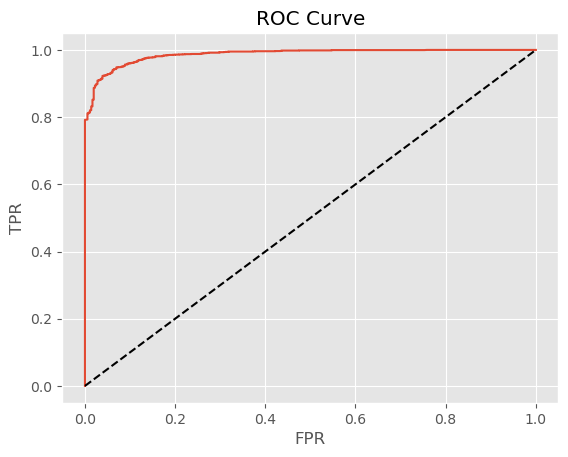

In [104]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color = 'black', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

Medimos ahora el AUC(Area Under the Curve) del modelo calculando el área debajo de la curva ROC. Esta métrica representa el grado o medida de separabilidad, es decir, nos dice lo capaz que es nuestro modelo de distinguir entre sus diferentes clases.

In [105]:
metrics.roc_auc_score(results_xgb[target],results_xgb['Attrition_Flag_score'])

0.9866368903911154

### Feature importance

Miramos ahora los atributos que han sido considerandos los mas relevantes por el modelo a la hora de detectar si un cliente abandonará el banco o no.


In [106]:
xgb_best_estim_feat = XGBoost.best_estimator_.feature_importances_

In [107]:
top_features_xgb = round(pd.Series(xgb_best_estim_feat , index = X_train.columns).sort_values(ascending = False),4)

In [108]:
top_features_xgb_nv=pd.DataFrame(top_features_xgb, columns=['% de impacto']).reset_index()

In [109]:
top_features_xgb_nv.head(10)

,index,% de impacto
0,Total_Trans_Ct,0.26
1,Total_Revolving_Bal,0.18
2,Total_Relationship_Count,0.14
3,Total_Ct_Chng_Q4_Q1,0.06
4,Total_Trans_Amt,0.05
5,Customer_Age,0.04
6,Marital_Status_Married,0.03
7,Total_Amt_Chng_Q4_Q1,0.03
8,Marital_Status_Single,0.03
9,Months_Inactive_12_mon,0.03


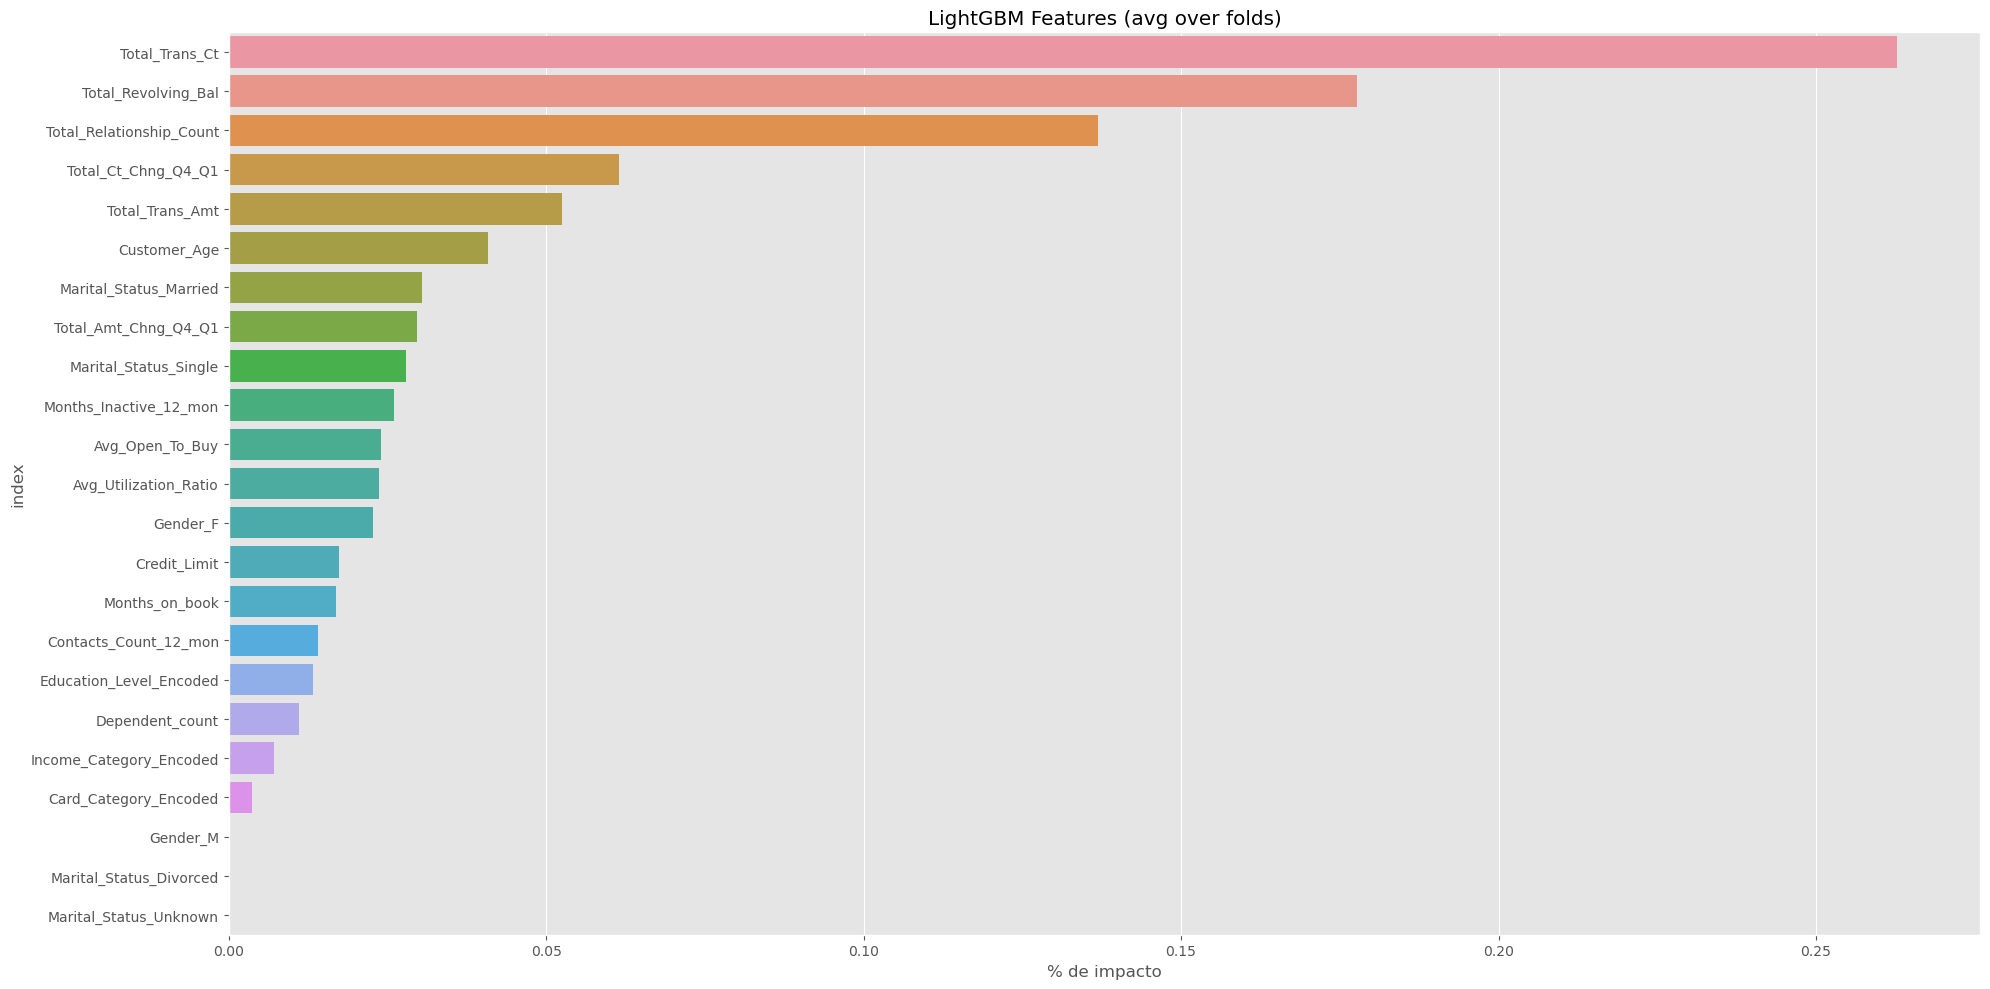

In [110]:

plt.figure(figsize=(20, 10))
sns.barplot(x="% de impacto", y="index", data=top_features_xgb_nv.sort_values(by="% de impacto", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

## Predicción

In [111]:
y_test = pd.DataFrame(XGBoost.predict(df_test_1), 
                            columns = ['target'])

In [112]:
y_test

,target
0,1
1,1
2,1
3,1
4,1
...,...
2021,1
2022,0
2023,1
2024,1


In [113]:
#chequeo mismo len que el df_test
y_test.shape

(2026, 1)

In [114]:
y_test['target'].mean()

0.8484698914116485

In [115]:
from json import loads, dumps
predictions = y_test.to_json('C:\Competencia\predictions.json')

#parsed = loads(result)
#dumps(parsed, indent=4) 